## Import Library

In [23]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import math

warnings.filterwarnings("ignore")

file_path = f"../Dataset/cleaned_dataset.csv"
df = pd.read_csv(file_path)
df = df.drop(columns=["dataset"])
palette = sns.color_palette("Set3", n_colors=10)
col_var = "#fb8072"

# EDA

### Dataset Structure

In [24]:
df.info(show_counts=True, memory_usage=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3687 entries, 0 to 3686
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  3687 non-null   int64  
 1   gender               3687 non-null   int64  
 2   jaundice_history     3687 non-null   int64  
 3   receive_transfusion  3687 non-null   int64  
 4   liver_condition      3687 non-null   int64  
 5   injectable_drug_use  3687 non-null   int64  
 6   drug_use             3687 non-null   int64  
 7   alcohol_consumption  3687 non-null   int64  
 8   alt                  3687 non-null   float64
 9   albumin              3687 non-null   float64
 10  alp                  3687 non-null   float64
 11  ast                  3687 non-null   float64
 12  bun                  3687 non-null   float64
 13  cholesterol          3687 non-null   float64
 14  cpk                  3687 non-null   float64
 15  creatinine           3687 non-null   f

In [25]:
df.head()

,age,gender,jaundice_history,receive_transfusion,liver_condition,injectable_drug_use,drug_use,alcohol_consumption,alt,albumin,...,glucose,total_bilirubin,total_calcium,total_protein,triglycerides,uric_acid,ldh,globulin,osmolality,hcv_status
0,27,1,2,2,2,2,1,1,26.0,4.6,...,98.0,0.7,9.7,7.2,43.0,6.2,118.0,2.6,289.0,0
1,20,2,2,2,2,2,2,2,11.0,4.7,...,89.0,0.6,9.1,7.1,19.0,3.9,112.0,2.4,280.0,0
2,68,2,2,2,2,2,2,1,20.0,3.9,...,87.0,0.6,9.5,6.6,56.0,5.1,121.0,2.7,284.0,1
3,23,2,2,2,2,2,2,1,15.0,5.2,...,91.0,0.3,9.8,7.8,146.0,4.9,121.0,2.6,276.0,0
4,48,2,2,2,2,2,2,2,34.0,4.3,...,105.0,1.8,10.0,8.0,103.0,5.4,169.0,3.7,275.0,0


### Check Missing Value

In [26]:
df.isnull().sum()

age                    0
gender                 0
jaundice_history       0
receive_transfusion    0
liver_condition        0
injectable_drug_use    0
drug_use               0
alcohol_consumption    0
alt                    0
albumin                0
alp                    0
ast                    0
bun                    0
cholesterol            0
cpk                    0
creatinine             0
ggt                    0
glucose                0
total_bilirubin        0
total_calcium          0
total_protein          0
triglycerides          0
uric_acid              0
ldh                    0
globulin               0
osmolality             0
hcv_status             0
dtype: int64

### Descriptive statistics

In [27]:
num_columns = ['age', 'alt', 'albumin', 'alp', 'ast', 'bun', 'cholesterol', 'cpk', 'creatinine', 'ggt', 'glucose', 'total_bilirubin', 'total_calcium', 'total_protein', 'triglycerides', 'uric_acid', 'ldh', 'globulin', 'osmolality']
df_num = df[num_columns]

cat_columns = ['gender', 'jaundice_history', 'receive_transfusion', 'liver_condition', 'injectable_drug_use', 'drug_use', 'alcohol_consumption', 'hcv_status']

df_cat = df[cat_columns].astype("category")

df_cat["gender"] = df_cat["gender"].replace({1: "Male", 2: "Female"})

df_cat["jaundice_history"] = df_cat["jaundice_history"].replace({1: "Yes", 2: "No"})
df_cat["receive_transfusion"] = df_cat["receive_transfusion"].replace({1: "Yes", 2: "No"})
df_cat["liver_condition"] = df_cat["liver_condition"].replace({1: "Yes", 2: "No"})
df_cat["injectable_drug_use"] = df_cat["injectable_drug_use"].replace({1: "Yes", 2: "No"})
df_cat["drug_use"] = df_cat["drug_use"].replace({1: "Yes", 2: "No"})
df_cat["alcohol_consumption"] = df_cat["alcohol_consumption"].replace({1: "Yes", 2: "No"})
df_cat["hcv_status"] = df_cat["hcv_status"].replace({0: "No", 1: "Yes"})


In [28]:
df_num.describe()

,age,alt,albumin,alp,ast,bun,cholesterol,cpk,creatinine,ggt,glucose,total_bilirubin,total_calcium,total_protein,triglycerides,uric_acid,ldh,globulin,osmolality
count,3687.000000,3687.000000,3687.000000,3687.000000,3687.000000,3687.000000,3687.000000,3687.000000,3687.000000,3687.000000,3687.000000,3687.000000,3687.000000,3687.000000,3687.000000,3687.000000,3687.000000,3687.000000,3687.000000
mean,47.716029,41.098865,4.173112,72.235518,40.008596,12.844510,185.562687,155.046296,0.896717,59.300090,102.297714,0.662874,9.367135,7.279836,145.091530,5.517163,134.340729,3.106805,277.705756
std,13.093923,40.929843,0.367943,24.346197,32.839463,5.089754,39.385285,169.983412,0.461295,98.821914,37.901536,0.338689,0.347204,0.504696,119.117175,1.317963,30.959306,0.565541,4.718087
min,18.000000,6.000000,2.100000,14.000000,10.000000,2.000000,80.000000,6.000000,0.320000,5.000000,31.000000,0.020000,7.200000,5.200000,19.000000,1.800000,46.000000,1.600000,258.000000
25%,38.000000,19.000000,3.961142,57.000000,22.000000,9.627338,158.894315,88.000000,0.730000,17.000000,86.000000,0.441840,9.144791,6.959217,77.000000,4.600000,114.215022,2.700000,275.000000
50%,50.000000,29.301638,4.200000,69.000000,28.680221,12.000000,182.229708,125.000000,0.850000,27.121664,93.576048,0.600000,9.383711,7.258280,111.000000,5.500000,131.000000,3.036886,277.954524
75%,58.000000,47.000000,4.400000,83.000000,43.804754,15.000000,208.000000,157.000000,0.980000,56.000000,104.464631,0.800000,9.600000,7.600000,174.691873,6.400000,148.780264,3.400000,280.309327
max,82.000000,1363.000000,5.400000,307.000000,597.000000,95.000000,565.000000,3910.000000,17.410000,1061.000000,554.000000,4.400000,12.000000,10.300000,2986.000000,11.400000,618.000000,6.300000,323.000000


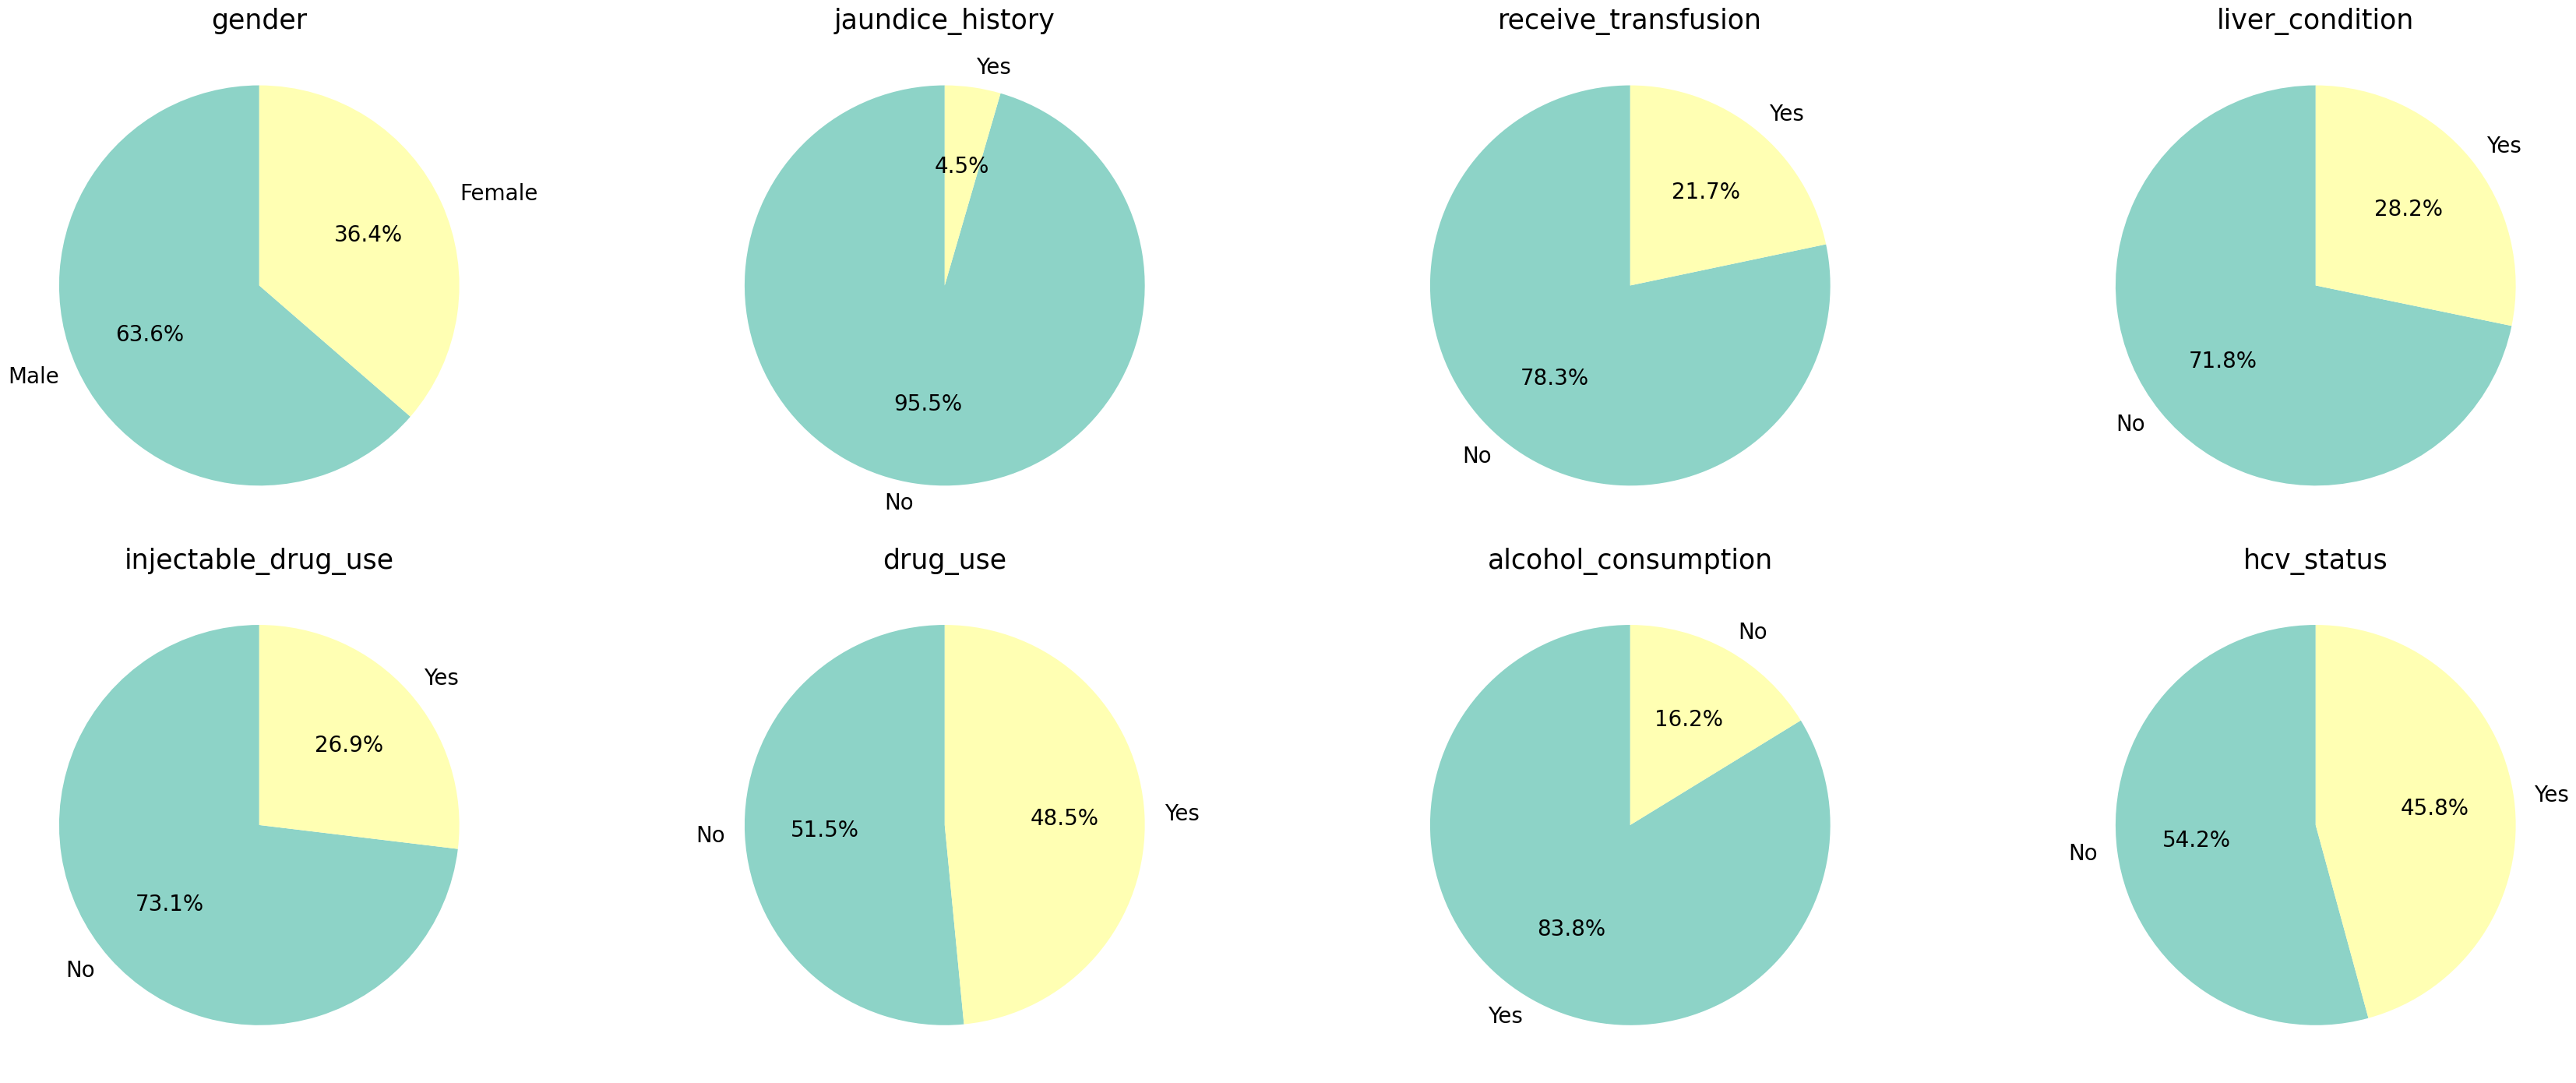

In [29]:
n_cols = len(cat_columns)

n_per_row = 4
n_rows = math.ceil(n_cols / n_per_row)

fig, axes = plt.subplots(n_rows, n_per_row, figsize=(n_per_row * 9, n_rows * 7))
axes = axes.flatten()

for i, col in enumerate(cat_columns):
    data = df_cat[col].value_counts()
    color_count = len(data)
    colors = palette[:color_count]
    axes[i].pie(
        data,
        labels=data.index,
        autopct='%1.1f%%',
        colors=colors,
        startangle=90,
        textprops={'fontsize': 20}
    )
    axes[i].set_title(col, fontsize=25)

for j in range(n_cols, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

### Data Distribution

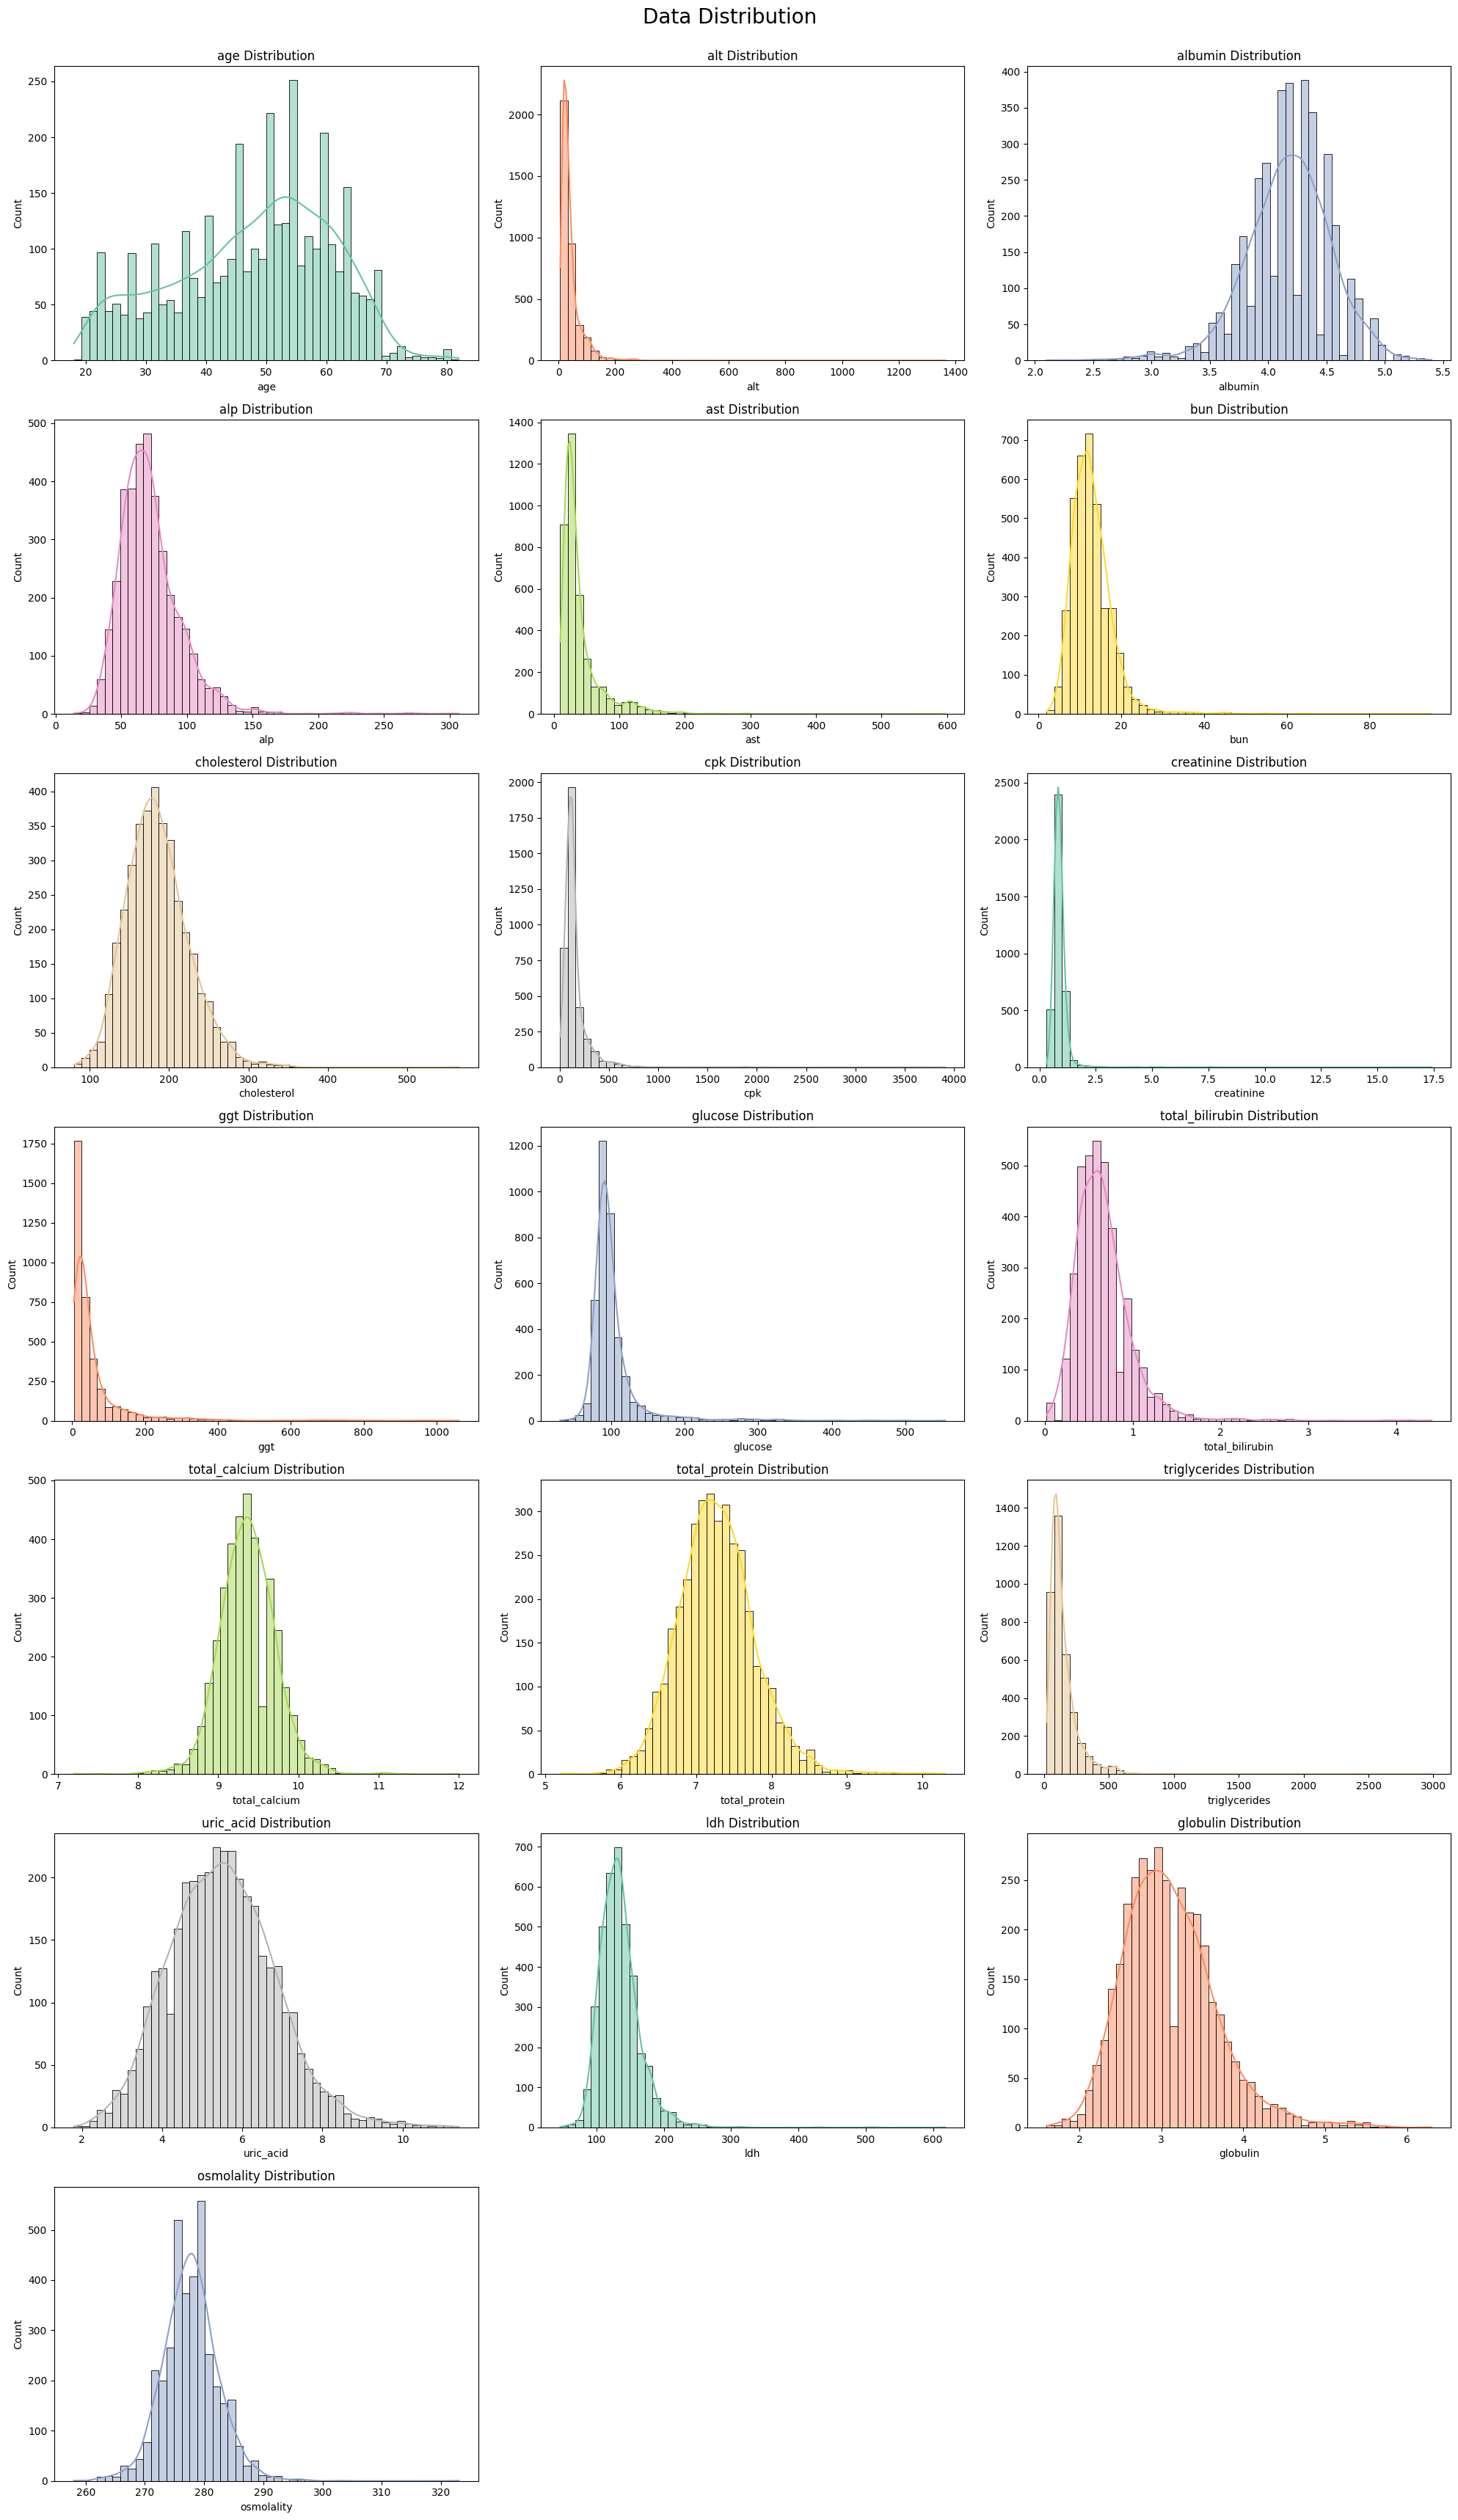

In [30]:
num_columns = ['age',  'alt', 'albumin', 'alp', 'ast', 'bun', 'cholesterol',
               'cpk', 'creatinine', 'ggt', 'glucose', 'total_bilirubin', 'total_calcium',
               'total_protein', 'triglycerides', 'uric_acid', 'ldh', 'globulin', 'osmolality']

cols = 3
rows = math.ceil(len(num_columns) / cols)  

fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = np.ravel(axes)

colors = sns.color_palette("Set2", len(num_columns))

for i, col in enumerate(num_columns):
    sns.histplot(df[col], bins=50, kde=True, color=colors[i], ax=axes[i])
    axes[i].set_title(f"{col} Distribution")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

# Hapus subplot kosong kalau ada
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Data Distribution", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()


### Data Correlation

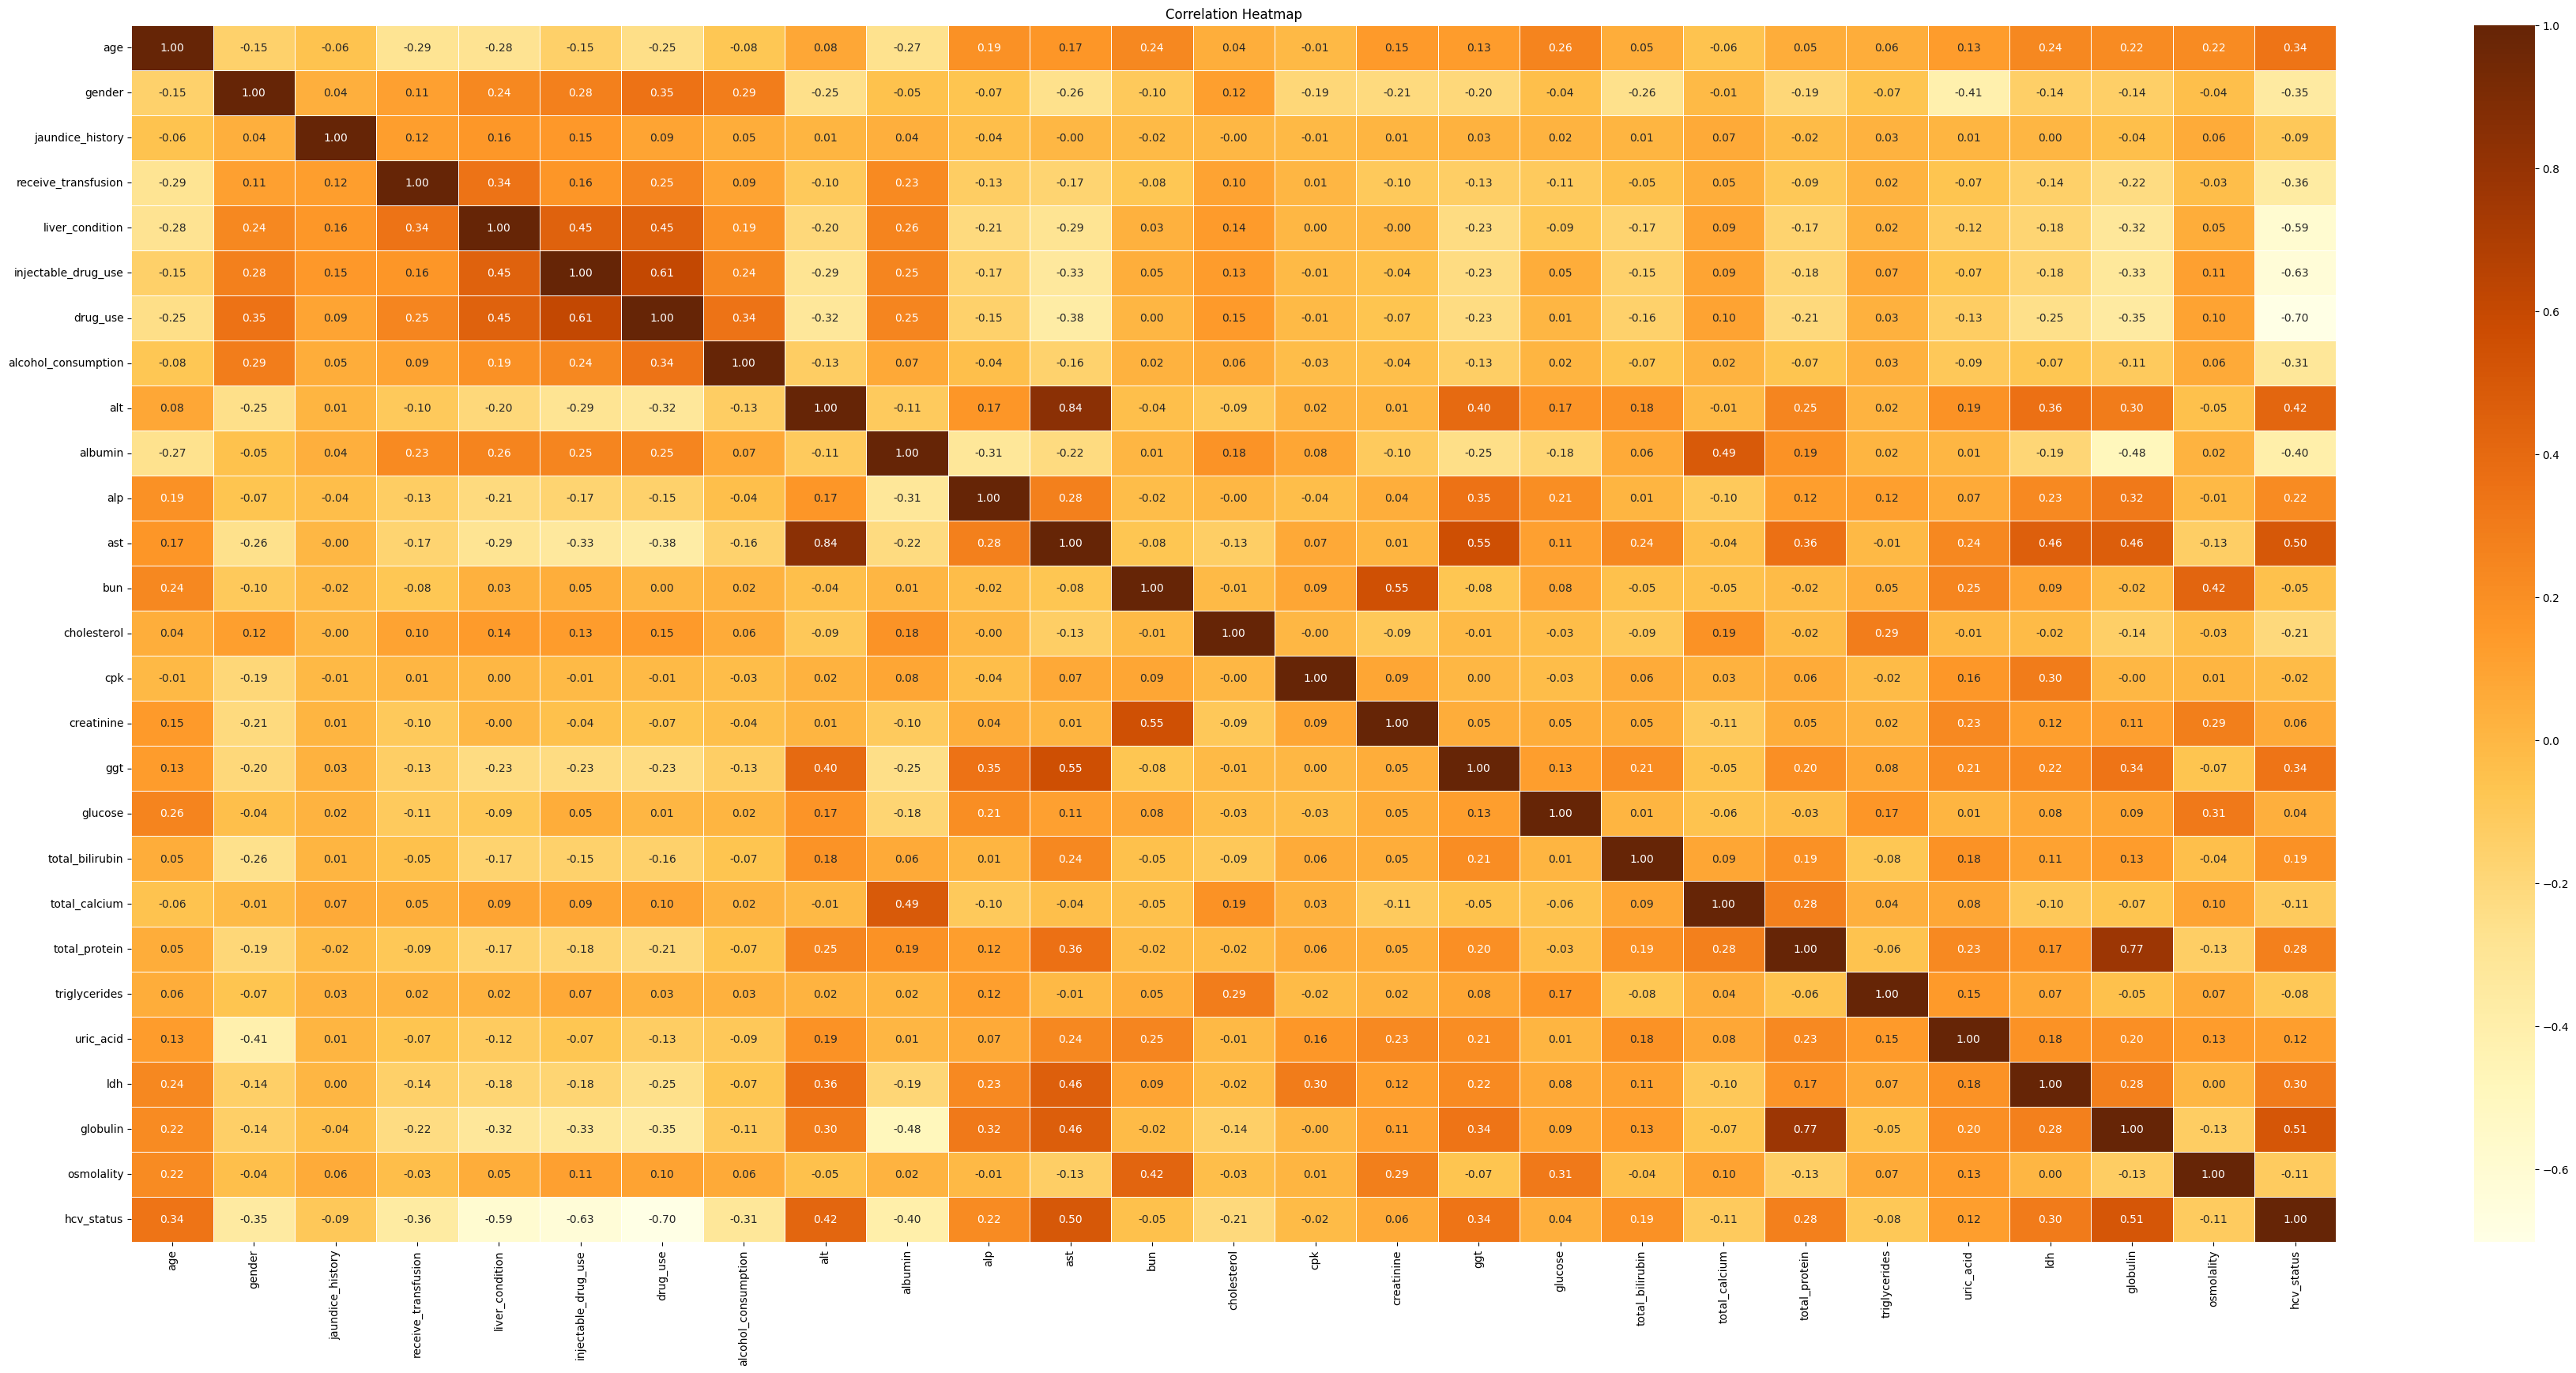

In [31]:
plt.figure(figsize=(45, 20))
sns.heatmap(df.corr(), annot=True, cmap="YlOrBr", fmt=".2f", linewidths=0.5, linecolor="white")
plt.title("Correlation Heatmap")
plt.show()

### Numerical Features vs Target

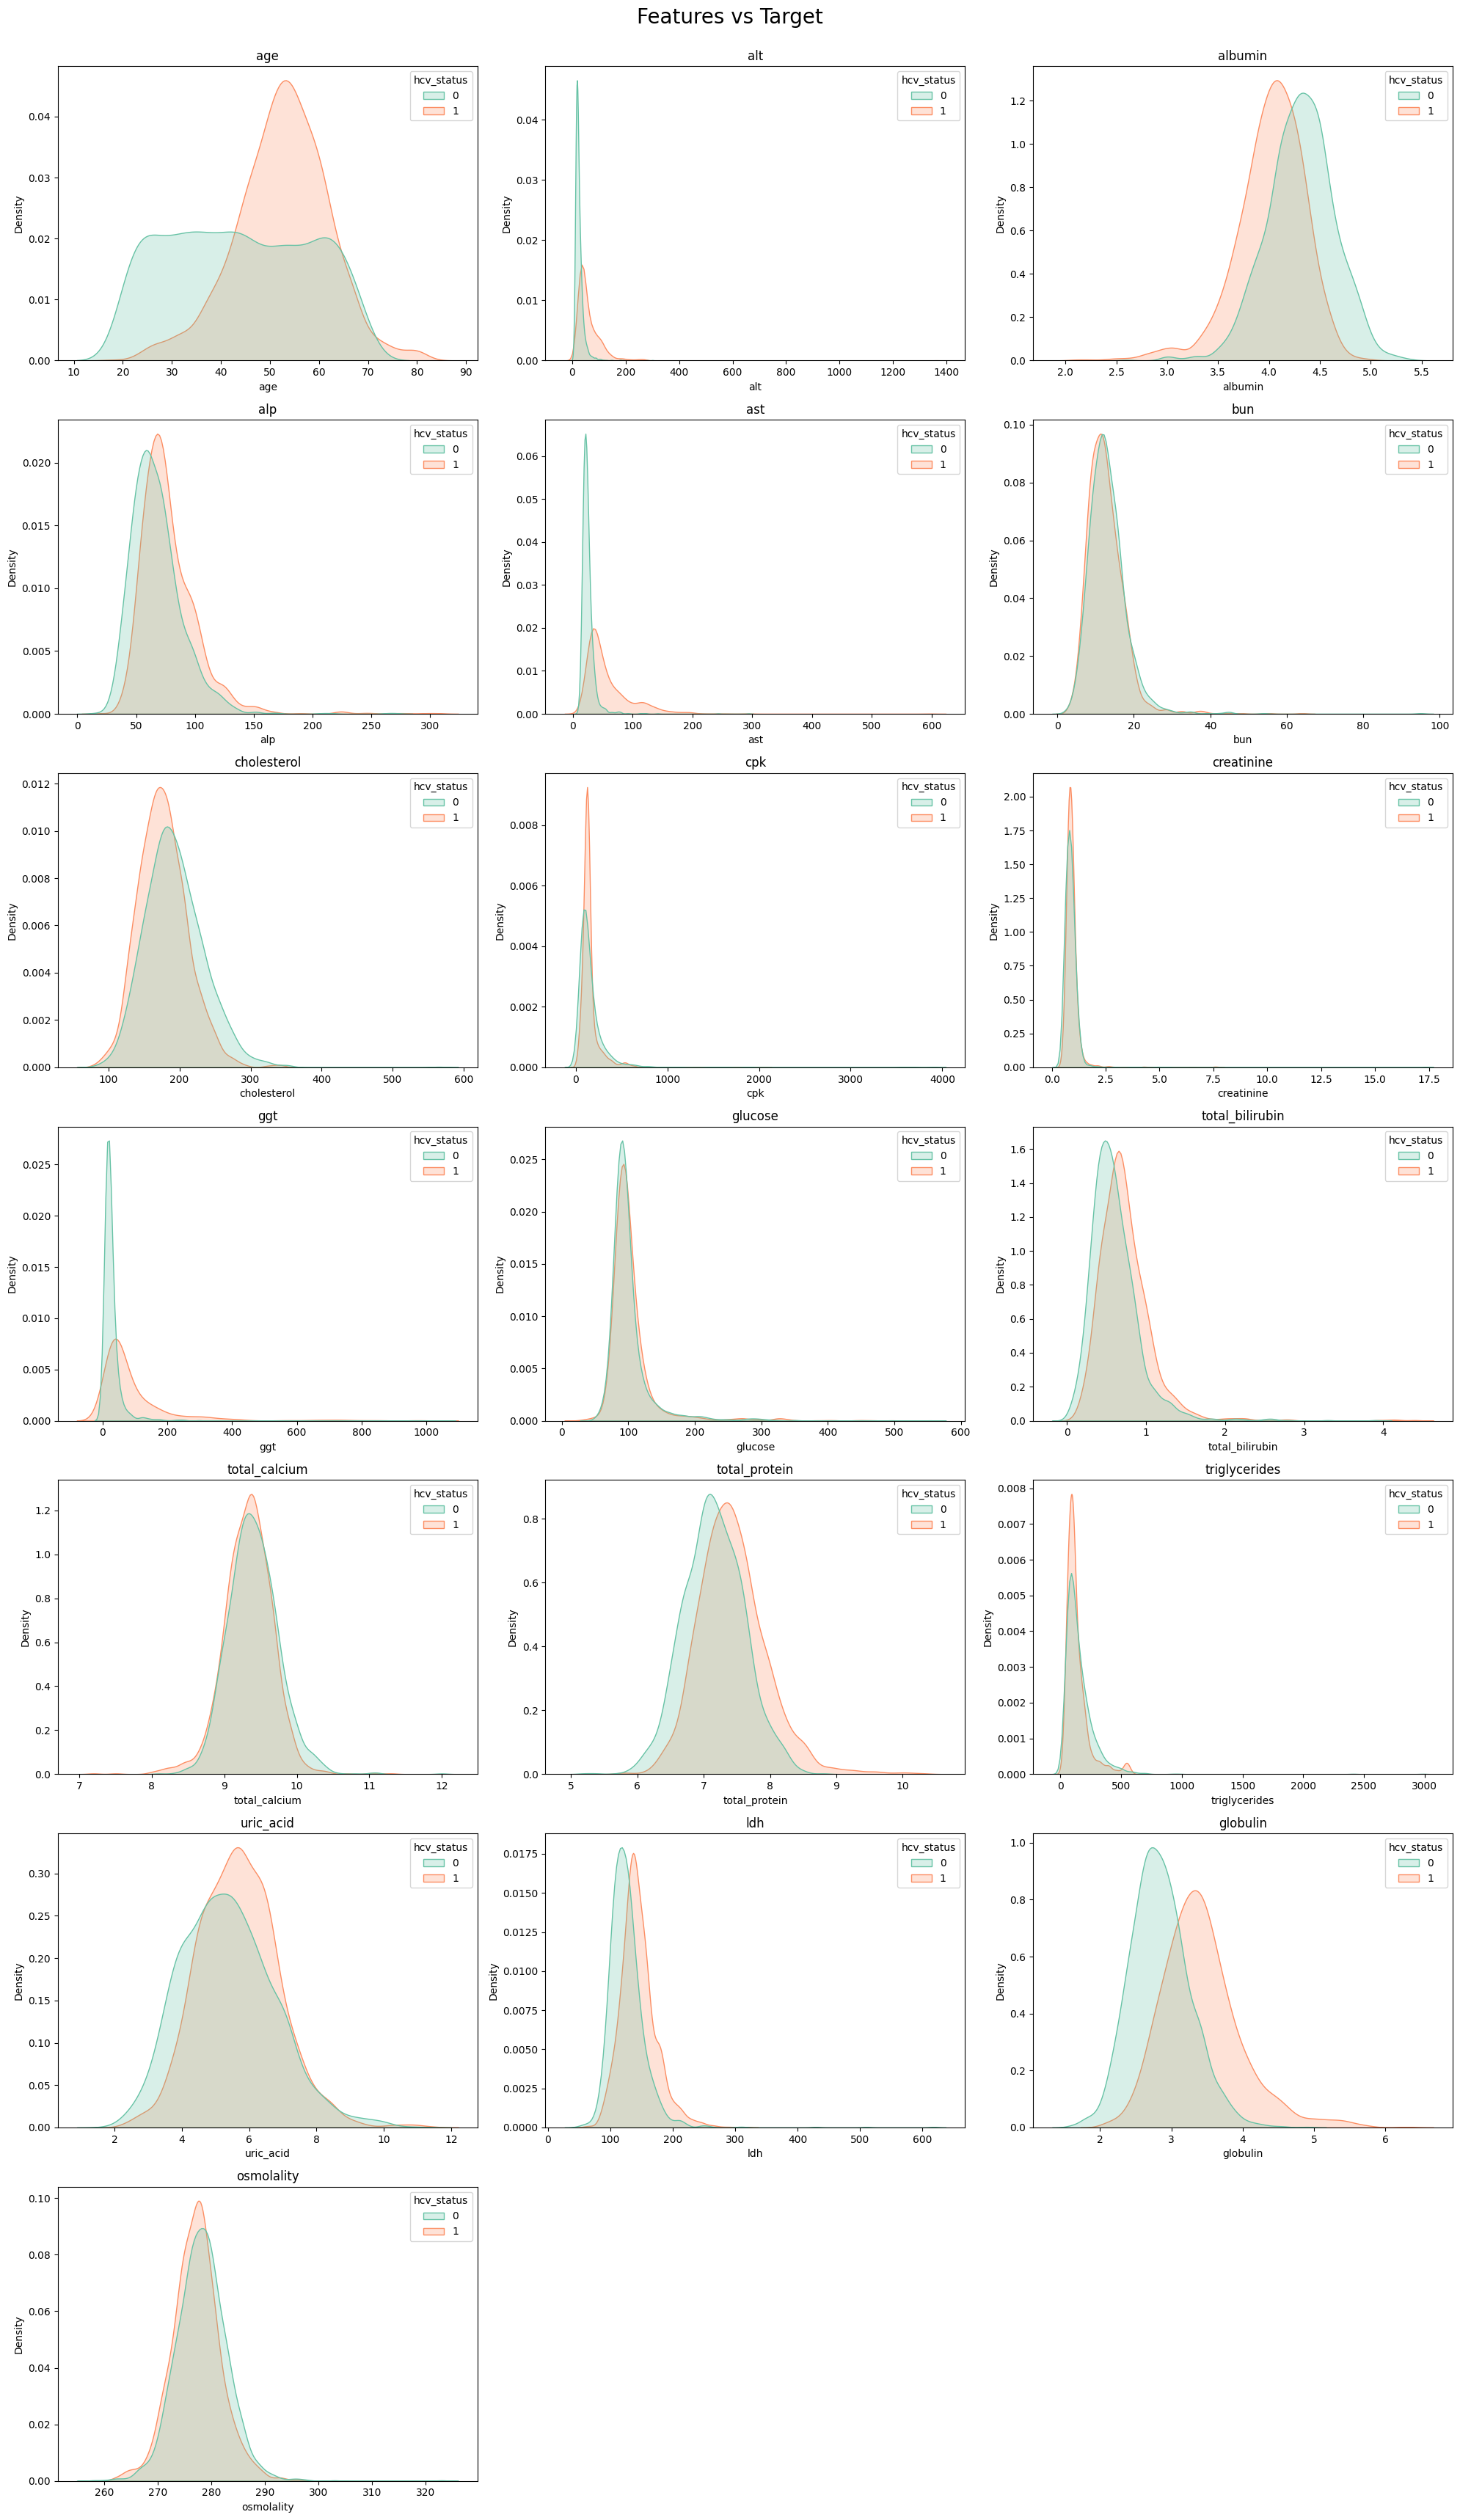

In [32]:
num_columns = df_num.columns  
target = "hcv_status"

cols = 3
rows = math.ceil(len(num_columns) / cols)  

fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()

colors = sns.color_palette("Set2", len(df[target].unique())) 

for i, col in enumerate(num_columns):
    sns.kdeplot(data=df, x=col, hue=target, fill=True, common_norm=False,
                palette=colors, ax=axes[i])
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Features vs Target", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

### Categorical Feature Vs Target

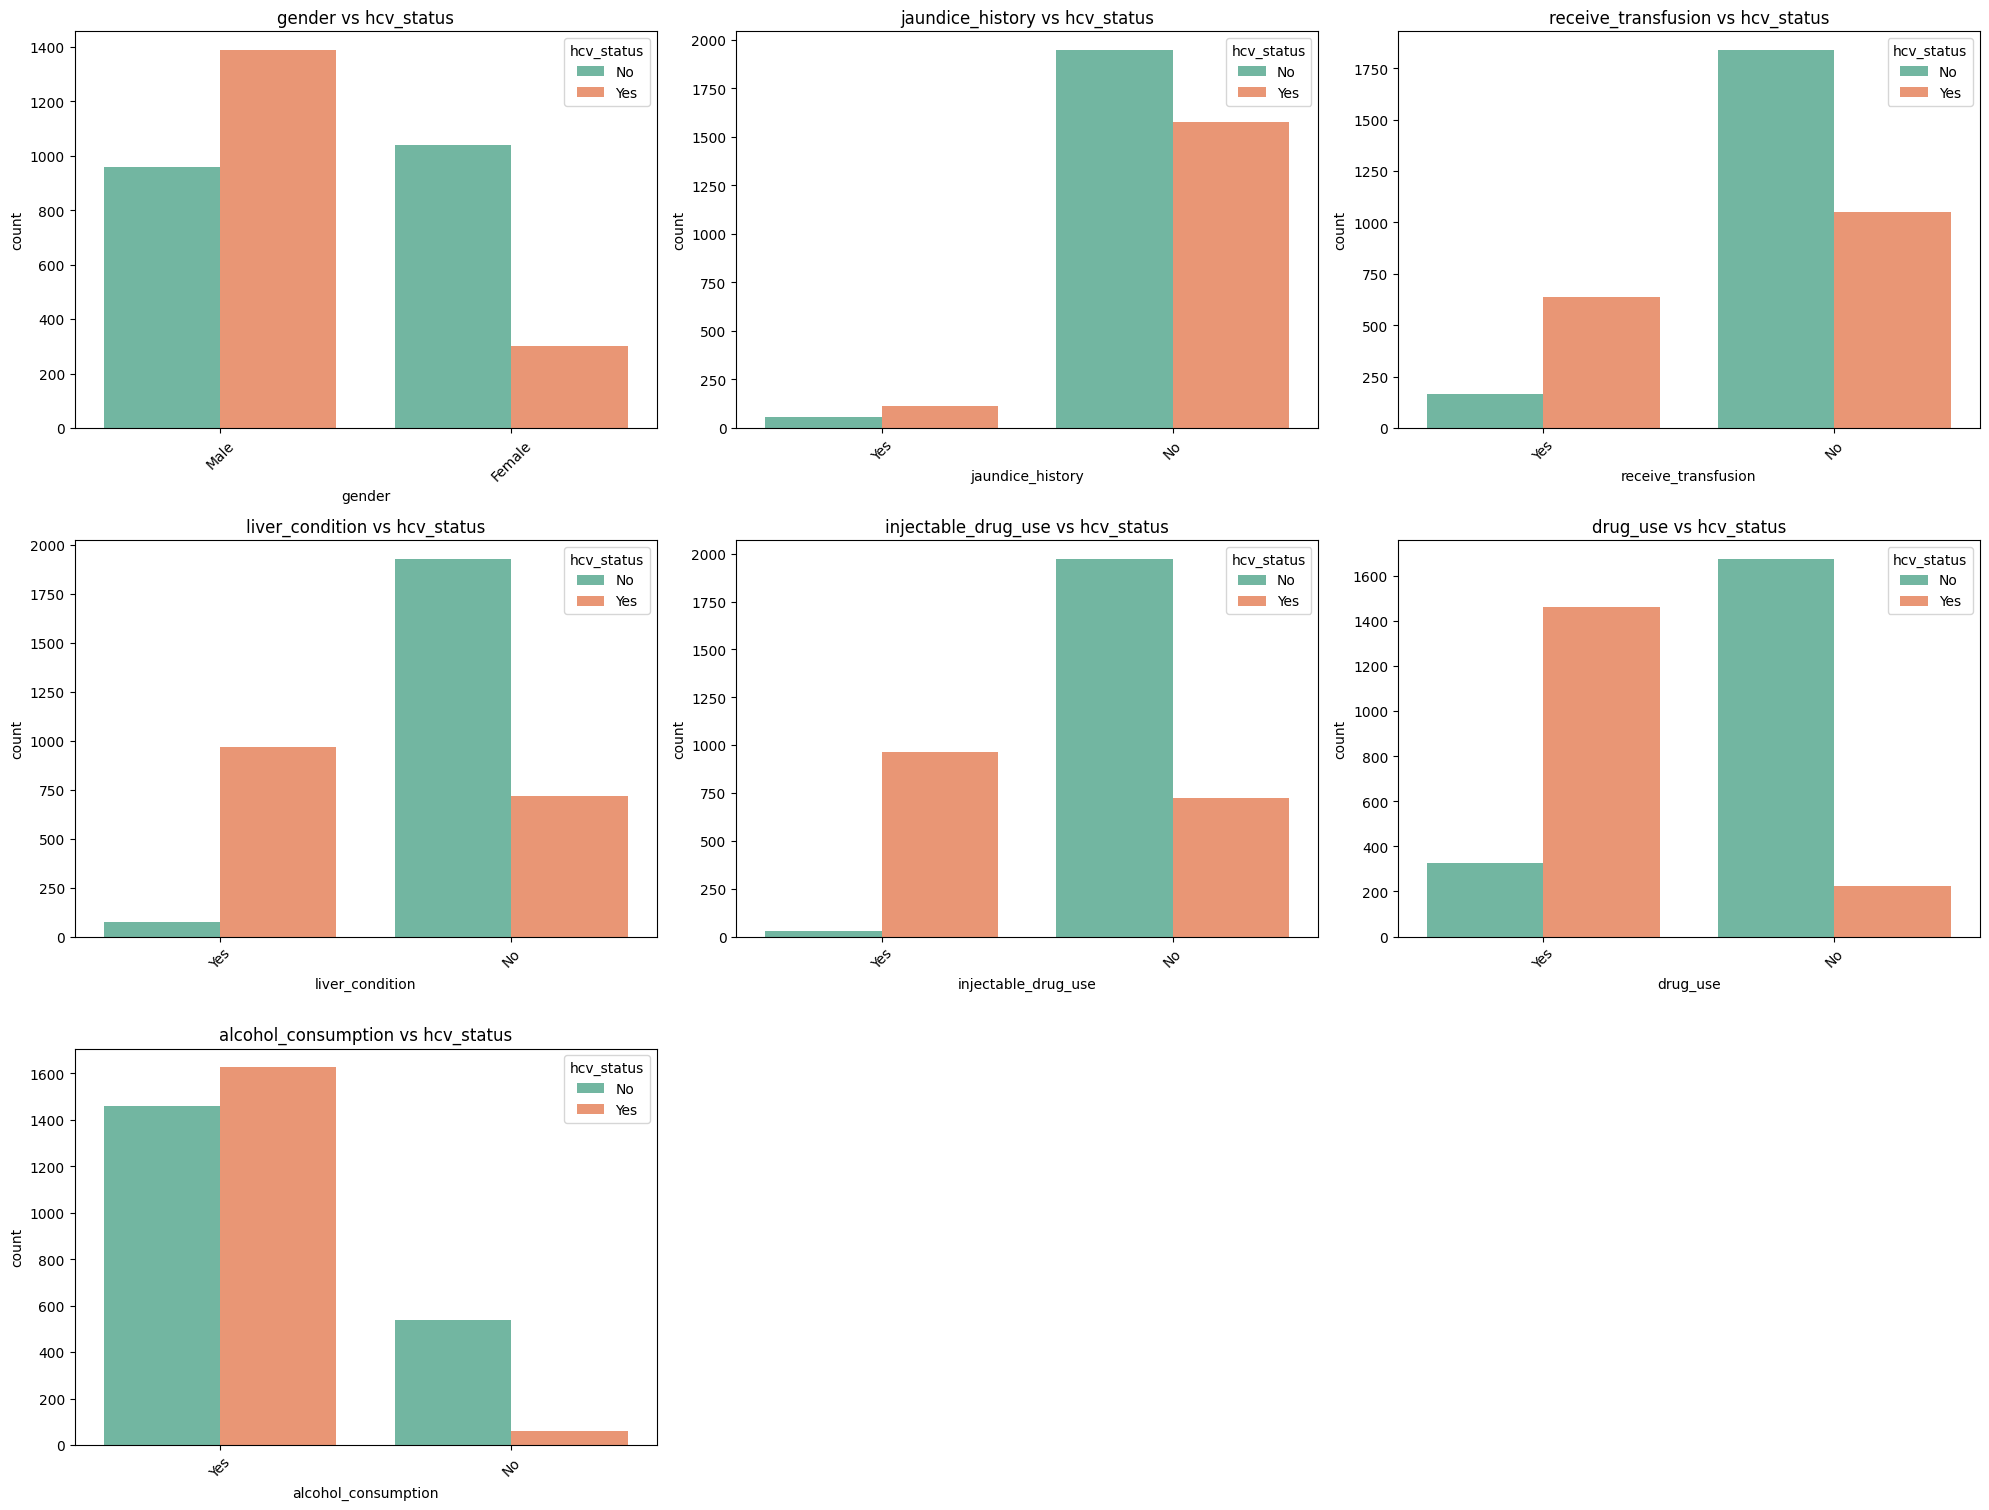

In [33]:
cols = 3
rows = math.ceil(len(num_columns) / cols)  

fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))

axes = axes.flatten()

for i, col in enumerate(cat_columns[:-1]):
    sns.countplot(data=df_cat, x=col, hue="hcv_status", palette=colors, ax=axes[i])
    axes[i].set_title(f"{col} vs hcv_status")
    axes[i].tick_params(axis='x', rotation=45)


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Feature Importance

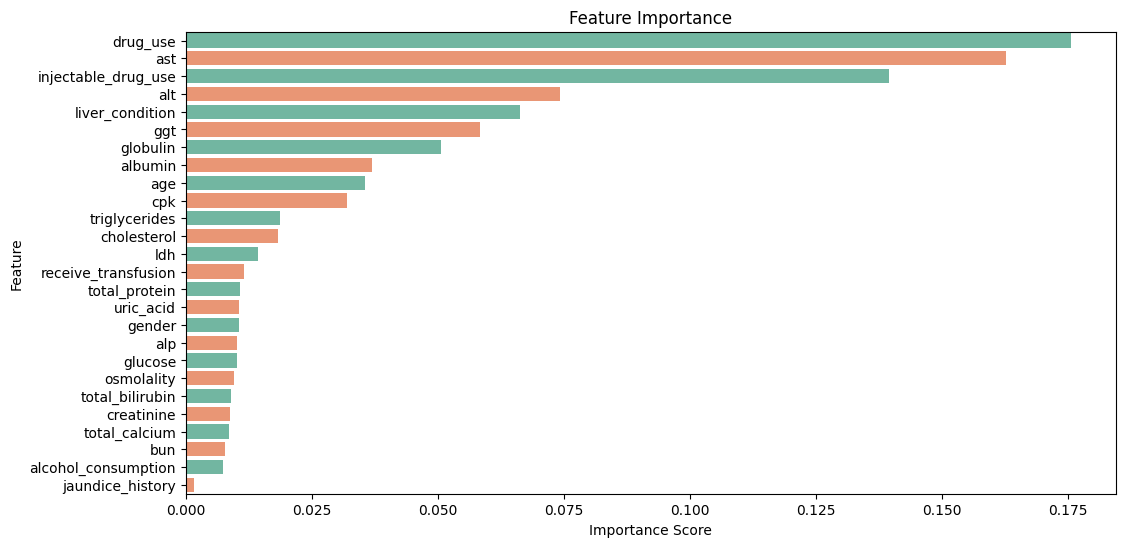

In [34]:
X_train = df.drop(columns=["hcv_status"])
y_train = df["hcv_status"]

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

importances = model.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df,  palette=colors)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()